In [1]:
import sys
sys.path.insert(0, '/Users/Daniel/Documents/Imperial/MSciProject/BOUT-dev/tools/pylib/')

In [12]:
from boututils.datafile import DataFile
from boutdata.collect import collect
from boututils.showdata import showdata

import numpy as np
import matplotlib.pyplot as plt
from  IPython.display import HTML
import seaborn as sns
import os 

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (20,10)
pal = sns.color_palette("Paired")

%matplotlib inline

In [3]:
path = '../SH_conduction/data'
df = DataFile(os.path.join(path, "BOUT.dmp.0.nc"))
q_t, kappa_0, T_t = -df['q_in'], df['kappa_0'], df['T_t']

print("Using kappa_0 = {0}, q_t = {1}, T_t = {2}".format(kappa_0, q_t, T_t))

L = np.linspace(0, df['length'], df['ny'])
T_analytic= lambda s : (T_t**(7/2) + (7*q_t*s)/(2*kappa_0) )**(2/7)

Using kappa_0 = 2000.0, q_t = 3500000.0, T_t = 10.0


In [4]:
T = collect("T", path=path)
p = showdata(T[:,0,:,0], interval=30)
plt.close()
HTML(p.to_html5_video())

mxsub = 1 mysub = 100 mz = 1

nxpe = 1, nype = 1, npe = 1

Reading from ../SH_conduction/data/BOUT.dmp.0.nc: [0-0][2-101] -> [0-0][0-99]


In [5]:
q = collect("q", path=path)
p = showdata(q[:,0,:,0], interval=10)
plt.close()
HTML(p.to_html5_video())

mxsub = 1 mysub = 100 mz = 1

nxpe = 1, nype = 1, npe = 1

Reading from ../SH_conduction/data/BOUT.dmp.0.nc: [0-0][2-101] -> [0-0][0-99]


mxsub = 1 mysub = 100 mz = 1

nxpe = 1, nype = 1, npe = 1

Reading from ../SH_conduction/data/BOUT.dmp.0.nc: [0-0][2-101] -> [0-0][0-99]


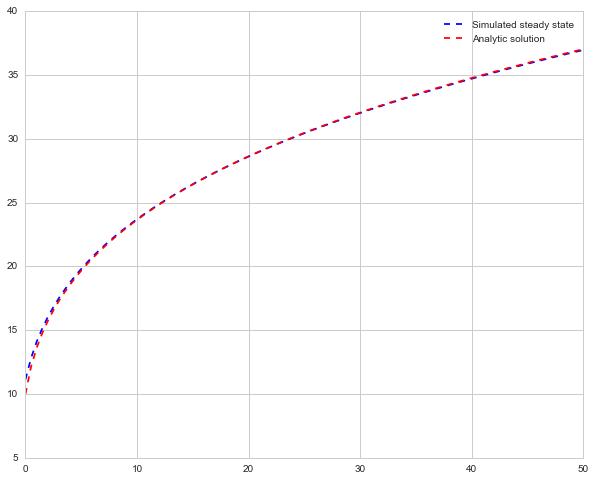

In [16]:
plt.figure(figsize=(10, 8))
T = collect("T", path=path)
plt.plot(L, T[-1, 0,:,0], 'b--', label="Simulated steady state")
plt.plot(L, T_analytic(L), 'r--', label="Analytic solution")
plt.legend()

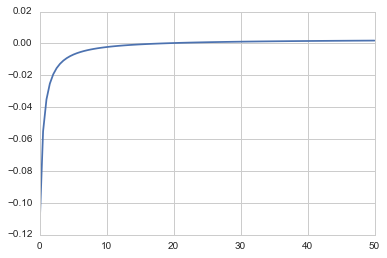

In [14]:
plt.plot(L, (T_analytic(L) - T[150, 0,:,0])/T_analytic(L))